In [10]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [11]:
%matplotlib inline

In [13]:
data = pd.read_csv("/Users/anushavan/Desktop/Study/\
Data_Science/Springboard/Capstone_1/data/test.csv", 
                parse_dates=['Pre- Filing Date','Fully Paid', 
                            'Approved','Fully Permitted','Signoff_Date'])

In [7]:
data[(data['Professional Cert'] == 'R') | (data['Professional Cert'] == 'J')]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
274632,500738696,1,STATEN ISLAND,16,WALCH PLACE,6668,25,5147807,NB,X,...,N,NaN,NaN,0,40.515602,-74.195535,51.0,198.0,Annadale-Huguenot-Prince's Bay-Eltingville,5147807.0
364201,103843469,1,MANHATTAN,3940,BROADWAY,2124,43,1087469,PA,D,...,W,06/21/2011,NaN,0,40.839277,-73.941052,10.0,251.0,Washington Heights South,1087469.0
1667884,301887929,1,BROOKLYN,620,EAST 102 STREET,8170,42,3407064,NB,X,...,N,NaN,NaN,0,40.648639,-73.899720,42.0,974.0,Canarsie,3407064.0


In [84]:
data = pd.read_csv("/Users/anushavan/Desktop/Study/\
Data_Science/Springboard/Capstone_1/data/test.csv", 
                parse_dates=['Pre- Filing Date','Fully Paid', 
                            'Approved','Fully Permitted','Signoff_Date'])

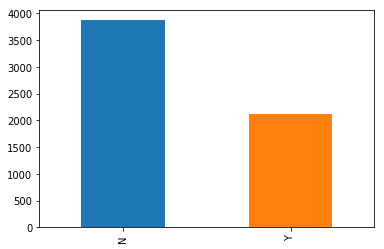

In [87]:
test['Professional Cert'].value_counts().plot(kind='bar')

### Clean up the dataframe

* converting all column names to *title case*, <br> 
* converting numeric data into numeric form by removing dollar signs and converting to intiger, <br> 
* creating a **"Duration"** column measuring the duration of the approval process as the difference between the "Approved" and "Fully Paid" columns <br> 
* creating subsets of data to hold normal values, values that are below 0 (meaningless) and zero values.
* Transform "Boroughs" into category to increase the speed of execution.

In [19]:
# Convert all data columns to Title Case
test.columns = test.columns.str.title()

# Convert Total Est. Fee to float data and remove $ symbol 
test['Total Est. Fee']= [float(c.replace('$','')) for c in test['Total Est. Fee']]

In [20]:
# Convert Proposed Dwelling Units to integers
test['Proposed Dwelling Units'] = (pd.to_numeric(test
                                  ['Proposed Dwelling Units'], errors='coerce'))


In [21]:
# Create a Duration column and convert it to integers (instead of days)
test['Duration'] = (test['Approved'] - test['Fully Paid']).dt.days

In [22]:
# transform the Boroughs into categories for faster analysis.
data['Borough'] = data['Borough'].astype('category')

In [23]:
# Subset of data where the Duration is more than 0 days
test = test[test['Duration'] > 0]

# Subset of data where the Duration is less then 0 days
odd_data = test[test['Duration'] < 0]

# Subset of data where the Duration is 0 days
zero_data = test[test['Duration'] == 0]

#### Dealing with blank (NaN/NaT) values

converting the NaN values to N string indicating No.

In [24]:
# Column Efiling Filed: replace the NaN values with N (No)
test['Efiling Filed'] = test['Efiling Filed'].fillna('N')

In [25]:
test['Professional Cert'] = test['Professional Cert'].fillna('N')

##### Potential columns to drop
The column "Proposed Dwelling Units" has 50392 not null values.

The columnn "Fully Permitted" has 7070 NaT entries.


##### Drop rows
There are 2 rows in the "Applicant Professional Title" column that are blank. Assigned them
to del_rows variable and deleted. 

In [26]:
del_rows = test[test['Applicant Professional Title'].isnull()].index
test.drop(del_rows, inplace=True)

### Analysis of data

Createing:
1. histograms (for categorical variables)
2. bar charts (for continuous variables) and 
3. boxplots for categorical variables (x axis) and a continuous variable (y axis).


In [27]:
test.head()

,Borough,Building Type,Efiling Filed,Applicant Professional Title,Professional Cert,Pre- Filing Date,Fully Paid,Approved,Fully Permitted,Total Est. Fee,...,Proposed Occupancy,Zoning Dist1,Zoning Dist2,Zoning Dist3,Special District 1,Special District 2,Non-Profit,Total_Construction_Floor_Area,Signoff_Date,Duration
106603,BRONX,1-2-3 FAMILY,N,RA,Y,2003-04-30,2003-05-16,2003-05-19,2003-05-28,270.97,...,J-3,R6,NaN,NaN,NaN,NaN,N,2330,2005-10-19,3.0
23177,QUEENS,1-2-3 FAMILY,N,RA,N,2004-09-27,2004-09-28,2005-01-03,2005-05-19,581.12,...,J-0,R4,NaN,NaN,NaN,NaN,Y,3879,2006-07-05,97.0
62314,QUEENS,1-2-3 FAMILY,Y,PE,N,2008-08-20,2008-08-27,2009-05-07,NaT,688.00,...,R-3,R4B,NaN,NaN,NaN,NaN,N,4650,NaT,253.0
13220,BRONX,OTHERS,Y,RA,N,2017-06-02,2017-06-02,2018-02-06,2018-09-25,81827.30,...,R-2,R8,NaN,NaN,NaN,NaN,Y,314105,NaT,249.0
69641,STATEN ISLAND,1-2-3 FAMILY,Y,RA,N,2013-04-05,2013-04-05,2013-10-22,NaT,464.00,...,R-3,R3-2,NaN,NaN,NaN,NaN,N,1200,NaT,200.0


In [32]:
newser = pd.concat([test['Zoning Dist1'],
                    test['Zoning Dist2'],test['Zoning Dist3']], axis=0, ignore_index=True)

In [35]:
newser.describe()

count     6466
unique     128
top         R6
freq      1121
dtype: object

In [36]:
newser1 = test['Zoning Dist1'].append(test['Zoning Dist2']).append(test['Zoning Dist3'])

In [44]:
lis = newser1[0:5].tolist()

In [47]:
lis

['R6', 'R4', 'R4B', 'R8', 'R3-2']

In [75]:
newser3 = (pd.concat
([test['Zoning Dist1'],test['Zoning Dist2'],test['Zoning Dist3']
 ,test['Special District 1'], test['Special District 2']], axis=1))

In [79]:
newser3['Special District 1'].value_counts()

SRD      218
SR       110
OP        43
LIC       22
NA-1      19
HS        18
MX-8      18
MID       12
DB        10
H          9
CD         9
WCH        7
DJ         5
HY         4
MX-4       4
BR         4
MX-5       3
TMU        3
HP         3
SCD        3
LI         2
SB         2
NA-2       2
N          2
CI         2
TA         2
CL         2
LH-1       2
MX-7       1
C          1
SW         1
CP         1
MX-13      1
MX-2       1
MX-6       1
CO         1
MX-1       1
MMU        1
SHP        1
MX-10      1
Name: Special District 1, dtype: int64

In [57]:
lis2 = []
for item in lis:
    lis2.append("%s_hayat" % item)
    
lis2

['R6_hayat', 'R4_hayat', 'R4B_hayat', 'R8_hayat', 'R3-2_hayat']

In [40]:
newser1.value_counts(dropna=False)

NaN          11510
R6            1121
R3-2           940
R5             636
R4             578
R3-1           330
R3X            305
R3A            278
R6B            240
R2             189
R7-1           169
M1-1           129
R1-2           109
R6A            108
R4-1            97
C2-2            84
R7-2            83
R4A             67
R7A             67
C1-2            49
R2A             45
M1-2            43
C2-3            42
R8              40
C1-3            36
C1-1            31
C3              29
R5B             28
C1-4            24
M3-1            24
             ...  
C1-8A            1
C5-2.5           1
C6-3X            1
C6-4M            1
C6-2G            1
M1-1/R7D         1
M1-1/R7-2        1
LH-1             1
C4-4D            1
C2-7A            1
C6-5.5           1
R9X              1
C5-P             1
M1-5A            1
C5-4             1
M1-5M            1
M1-2/R5B         1
M1-4/R7A         1
C1-8X            1
C2-8A            1
M1-5/R9          1
M1-4/R6B    

count        5.00000
mean     23692.20000
std      12785.29889
min       9308.00000
25%      14679.00000
50%      20471.00000
75%      36273.00000
max      37730.00000
Name: Borough, dtype: float64

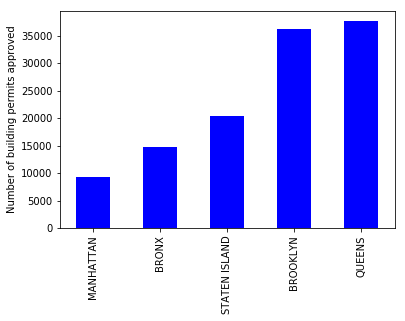

In [187]:
# create a histogram for the # of building permits issued by Borough
ax = test['Borough'].value_counts().sort_values().plot(kind='bar', color = 'b')
ax.set_ylabel('Number of building permits approved')
ax.set_xlabel('')
test['Borough'].value_counts().describe()

count        2.000000
mean     59230.500000
std      15513.215672
min      48261.000000
25%      53745.750000
50%      59230.500000
75%      64715.250000
max      70200.000000
Name: Building Type, dtype: float64

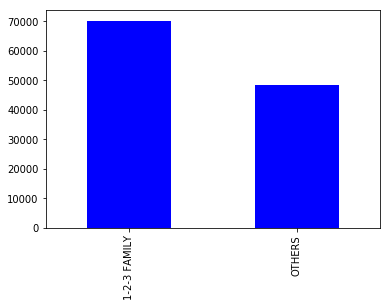

In [191]:
# Create a histogram of Building Type and include a statistical analysis.
test['Building Type'].value_counts().plot(kind='bar', color='b')
test['Building Type'].value_counts().describe()

count        2.000000
mean     59230.500000
std      13628.068994
min      49594.000000
25%      54412.250000
50%      59230.500000
75%      64048.750000
max      68867.000000
Name: Efiling Filed, dtype: float64

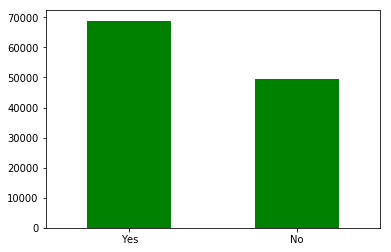

In [198]:
# Create a histogram of Efiling and include a statistical analysis.
ax = test['Efiling Filed'].value_counts().plot(kind='bar', color='g')
ax.set_xticklabels(['Yes','No'],rotation=360)

test['Efiling Filed'].value_counts().describe()

In [172]:
# Create a histogram of duration and include a statistical analysis.
test['Duration'].plot(kind='hist', bins = 200)
plt.xlim(0,1500)
plt.xlabel('Approval duration (days)')
test['Duration'].describe()

KeyError: 'Duration'

In [ ]:
test['TOTAL_CONSTRUCTION_FLOOR_AREA'].mean()

In [ ]:
odd_data['TOTAL_CONSTRUCTION_FLOOR_AREA'].mean()

In [ ]:
# Number of data points where Duration is 0
zero = test[test['Duration'].dt.days == 0].count()['Duration']
zero

In [ ]:
# Number of data points where Duration is Negative
negative = test[test['Duration'] < '0 days'].count()['Duration']
negative

In [ ]:
# Number of data points where Duration is NaN 
nan_vals = test[test['Duration'].isna()].count()['Borough']
nan_vals

In [ ]:
zero + negative + nan_vals + test

In [ ]:
test = newdata.count()['Duration']
normal

In [ ]:
(test.groupby('Borough')['Duration'].mean().
 sort_values().plot(kind='bar', color = 'blue'))
plt.xlabel('')
plt.ylabel('Average days for approval')

In [ ]:
test.head(2)

In [ ]:
test.groupby('Building Type')['Duration'].mean().plot(kind='bar')

In [ ]:
# transform the Boroughs into categories for faster analysis.
test['Borough'] = test['Borough'].astype('category')

In [ ]:
(test.groupby(['Borough','Building Type'])['Total_Construction_Floor_Area'].
 sum().sort_values().plot(kind='bar',color='green'))

In [ ]:
normal_data.iloc[:,4:18]

In [ ]:
agg=(data.groupby('Borough')
 ['Total_Construction_Floor_Area']
     .agg(['mean','median']).round(0))

In [ ]:
agg.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Total construction area (sqf)')

In [ ]:
agg1 =(data.groupby('Efiling Filed')
 [['Duration','Total_Construction_Floor_Area']].agg(['mean','median']))

In [ ]:
ax = agg1['Duration'].plot(kind='bar')
ax.set_xlabel('Electronic filing')
ax.set_ylabel('Approval duration (days)')
ax.set_xticklabels(['Yes','No'],rotation=360)
ax.legend(loc='upper left')

In [ ]:
data.head(2)

In [ ]:
x = data.set_index(['Proposed Occupancy','Borough'])

In [ ]:
x.groupby(level=['Borough']).mean()

In [ ]:
data.head(2)

### Selecting outliers

Selecting outliers based on the Total_Construction_Floor_Area variable. Applying a filter to
select values that are +- 3 standard deviation in this variable. Total number of outliers is
517 data points, which is 0.08% of the total data.

In [ ]:
from scipy.stats import zscore

In [ ]:
standardized = (normal_data.
                groupby('Borough')['Total_Construction_Floor_Area'].transform(zscore))

In [ ]:
outliers = standardized[(standardized > 3) | (standardized < -3)]

In [ ]:
outlier_data = data.iloc[outliers]

In [ ]:
outlier_data

In [ ]:
ax = (outlier_data.groupby('Borough').mean()
      ['Duration'].sort_values().plot(kind='bar', color='b'))

ax.set_ylabel('Duration (days)')
ax.set_xlabel('')

In [ ]:
data.head(2)

In [ ]:
by_boro_data = (data.groupby(
    ['Borough','Pre- Filing Date'])['Duration']).agg(['median', 'max', 'min'])

In [ ]:
by_boro_data.groupby('Borough').mean().plot(kind='bar')
# by_boro_data.loc['QUEENS']['Duration'].plot(kind='hist', bins=50, color='yellow',alpha=0.5)
# by_boro_data.loc['MANHATTAN']['Duration'].plot(kind='hist', bins=50, color='red',alpha=0.5)
# plt.subplots
# plt.xlim(0,800)
